<a href="https://colab.research.google.com/github/belyakov23/intro-ml-projects-/blob/main/salary_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Prediction with Simple Linear Regression

This project uses a small Kaggle salary dataset with two columns: YearsExperience and Salary. The goal is to predict salary from years of professional experience.

I load the data with pandas, remove an extra index column, explore basic statistics, and visualise the relationship between experience and salary with a scatter plot. Then I split the data into training and test sets and fit a Linear Regression model using scikit-learn.

On the test set, the model achieves an R-squared of about 0.90, with mean absolute error around 6,300. I also plot actual vs predicted salaries to show that the regression line fits the data reasonably well.


In [3]:
!pip install -q kagglehub

import kagglehub
import os
import pandas as pd

# Download latest version of the dataset
path = kagglehub.dataset_download(
    "abhishek14398/salary-dataset-simple-linear-regression"
)

print("Path to dataset files:", path)
print(os.listdir(path))

csv_path = os.path.join(path, "Salary_dataset.csv")
df = pd.read_csv(csv_path)

df.head()


Using Colab cache for faster access to the 'salary-dataset-simple-linear-regression' dataset.
Path to dataset files: /kaggle/input/salary-dataset-simple-linear-regression
['Salary_dataset.csv']


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df = df.drop(columns=["Unnamed: 0"])
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


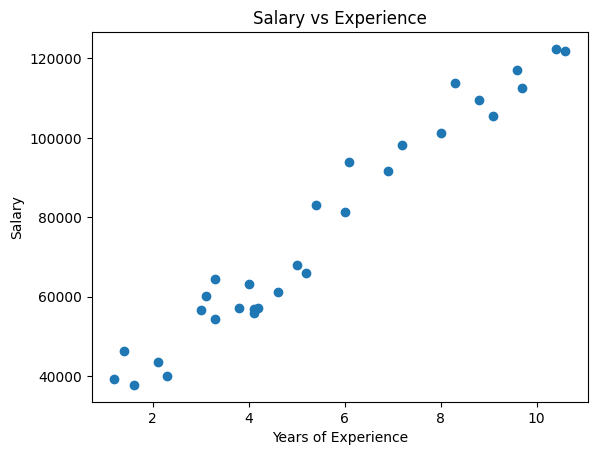

In [5]:
plt.scatter(df["YearsExperience"], df["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[["YearsExperience"]]
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

Mean Squared Error (MSE): 49830096.855908394
Mean Absolute Error (MAE): 6286.453830757745
R-squared (R^2): 0.9024461774180497


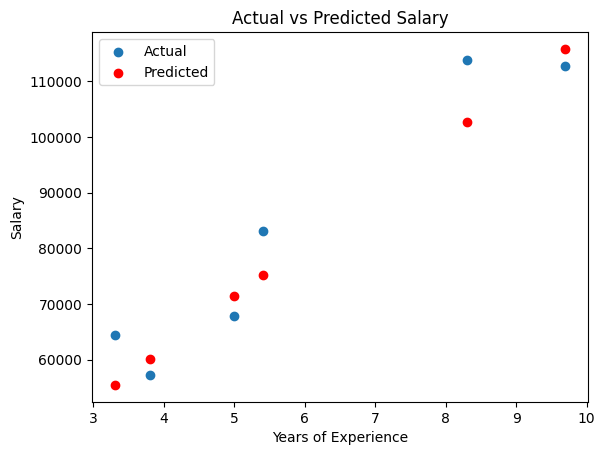

In [7]:
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.show()
